In [9]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Confirmation
print("Libraries Imported Successfully")

Libraries Imported Successfully


In [10]:
# --- Set Plot Styles ---
# Optional matplotlib style
plt.style.use('ggplot')  # or 'classic', 'bmh', 'dark_background', etc.
# Seaborn style
sns.set(style="darkgrid")  # You can also try 'whitegrid', 'dark', etc.

In [11]:
# --- Step 1: Download Stock Data ---
ticker = 'AAPL'  # Change this to your preferred stock symbol
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [12]:
# --- Step 2: Preview the Data ---
print("Data shape:", data.shape)
display(data.head())

Data shape: (2515, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [13]:
# --- Step 3: Save to CSV ---
data.to_csv(f'../data/{ticker.lower()}_stock.csv')

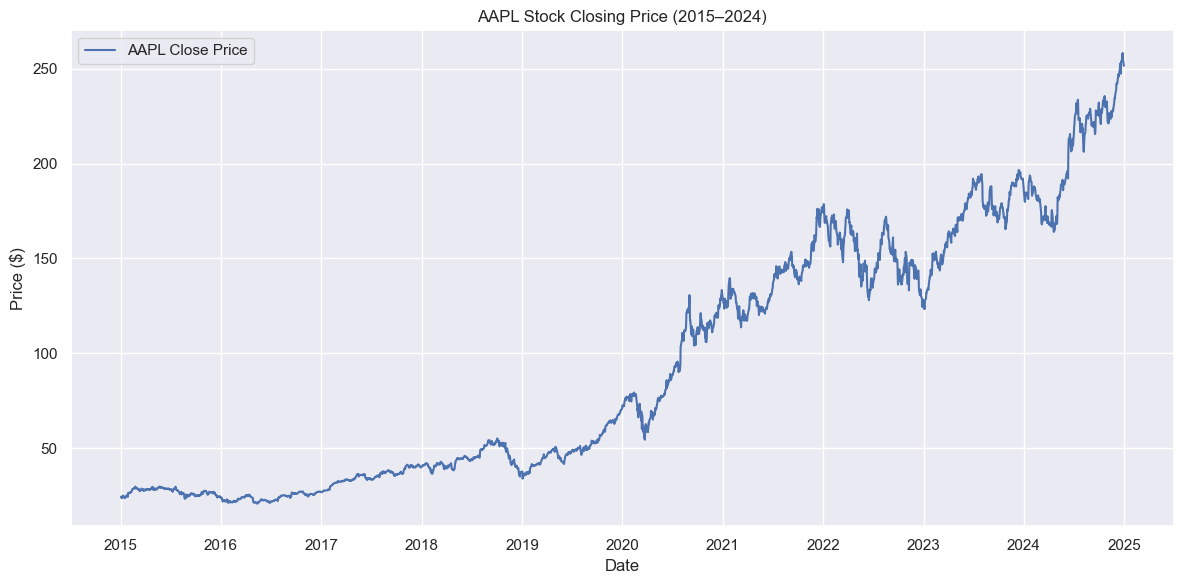

In [14]:
# --- Step 4: Basic Plot - Closing Price Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{ticker} Close Price')
plt.title(f'{ticker} Stock Closing Price (2015–2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

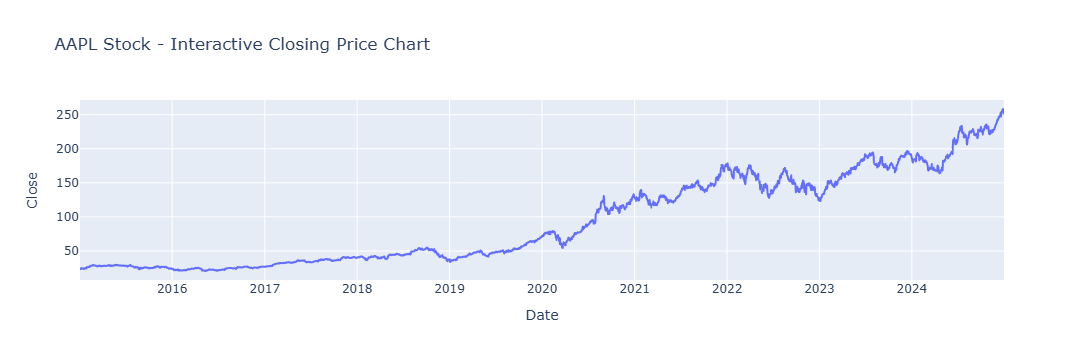

In [15]:
# --- Step 5: Interactive Plot (Plotly) ---
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

fig = px.line(data, x=data.index, y="Close", title=f"{ticker} Stock - Interactive Closing Price Chart")
fig.show()

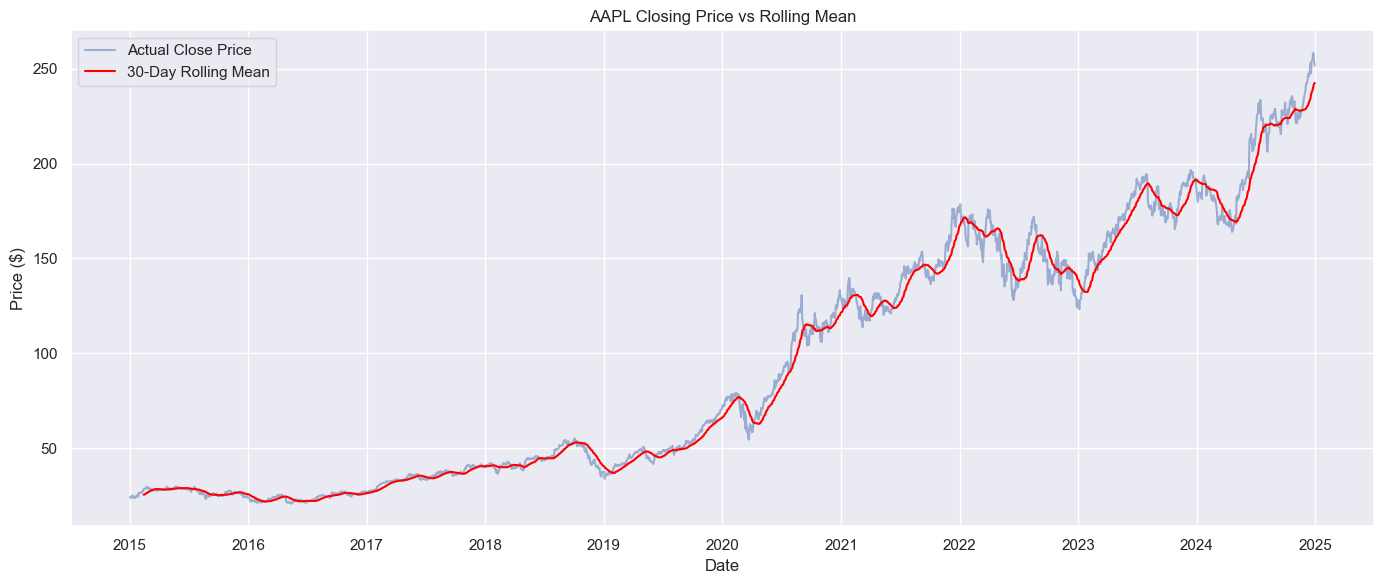

In [16]:
# --- Step 6: Rolling Mean for Trend Visualization ---
window_size = 30  # 30-day rolling window
data['RollingMean'] = data['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Actual Close Price', alpha=0.5)
plt.plot(data['RollingMean'], label=f'{window_size}-Day Rolling Mean', color='red')
plt.title(f'{ticker} Closing Price vs Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Ensure the index is a proper datetime index
data.index = pd.to_datetime(data.index)

# Drop NaNs (if any) for decomposition
decompose_data = data['Close'].dropna()

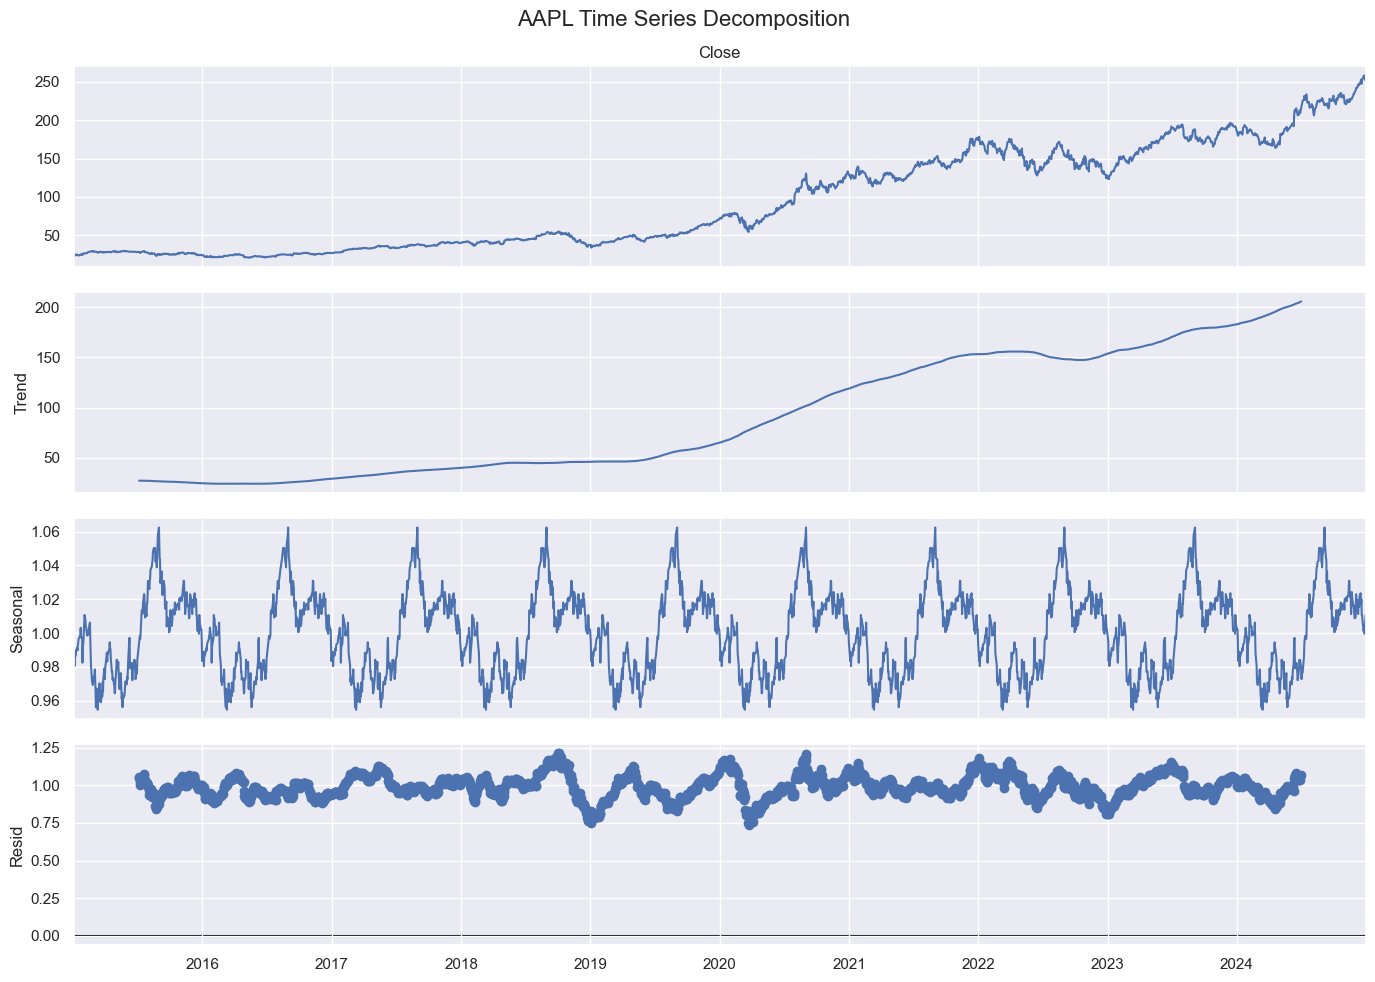

In [18]:
# --- Step 7: Time Series Decomposition (Approach 1) ---
result = seasonal_decompose(decompose_data, model='multiplicative', period=252)  # approx. 252 trading days/year

# Plot decomposition
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle(f'{ticker} Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

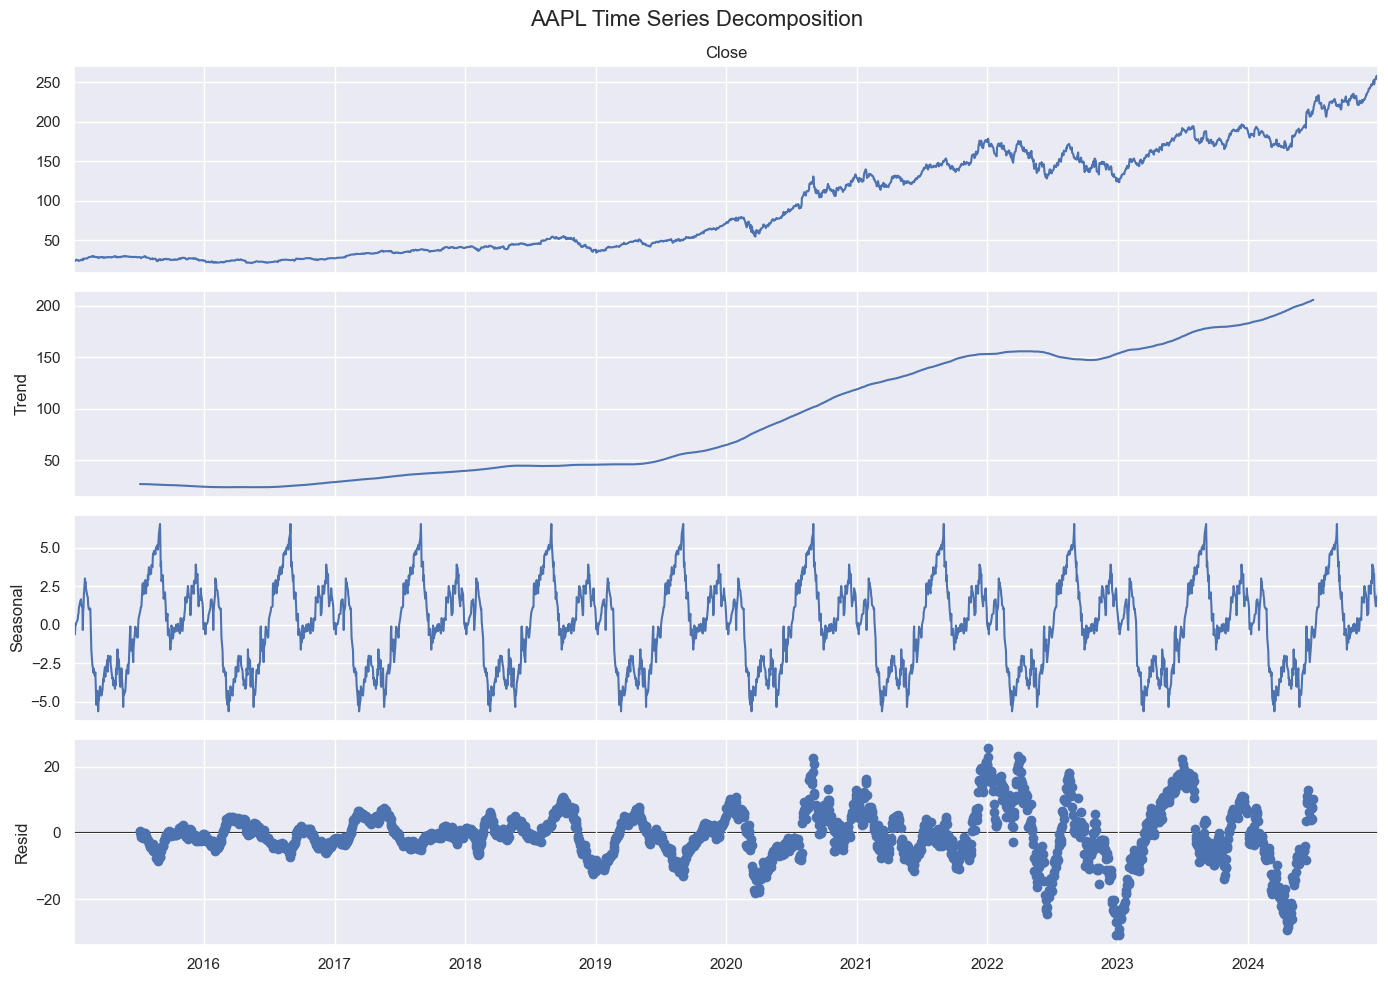

In [19]:
# --- Step 7: Time Series Decomposition (Approach 2)---
result = seasonal_decompose(decompose_data, model='additive', period=252)  # approx. 252 trading days/year

# Plot decomposition
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle(f'{ticker} Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()